#### This Notebook contains the step of training a CBM Model

Insert the current directory to import other python files

In [1]:
import sys
sys.path.insert(0, "..")


In [2]:
from source import data_processing, train_model

dir ="../dataset/CUB_200_2011/"   #-----directory of the CUB dataset
#train_data, val_data, test_data = data_processing.extract_data(dir)  
train_data, test_data = data_processing.extract_data(dir)  #-----data_processing function is modified not to split the validation set for now
print(f"Train data: {len(train_data)} and Test Data: {len(test_data)}")

c:\Users\DELL\anaconda3\envs\py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of train images from official train test split: 5994
Train data: 5994 and Test Data: 5794


Checking if the images can be loaded correctly or not, this step is optional for training

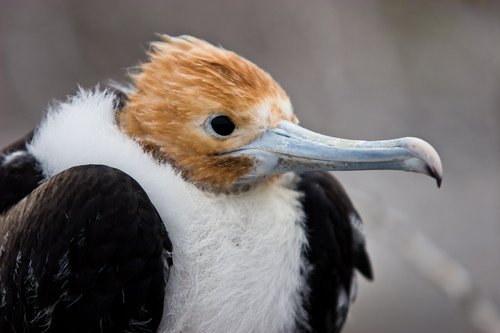

In [3]:
from PIL import Image
img = Image.open(train_data[0]['img_path'])
img

**Creating an instance of CBM class**

In [3]:
from source import models
import torch
from torch import nn

#device = "cuda" if torch.cuda.is_available() else "cpu"
device ='cpu'
model = models.CBM(c_chanel=1, 
                   hidden_units=32, 
                   concepts=312, 
                   output_shape=200,
                   img_shape=28).to(device)

In [4]:
#--------------SAVE THE UNTRAINED MODEL-------------------
#torch.save(model, '../saved_models/base_model.pickle')

**The following code segment is only to find out the gray scale images in the training dataset. Since it has been run once, it is now commented out**

In [5]:
training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model,
                           epochs=100,
                           BATCH_SIZE=32,
                           train_data=train_data,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           img_shape=28)

### Train the model

In [6]:
training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model,
                           epochs=100,
                           BATCH_SIZE=32,
                           train_data=train_data,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           img_shape=28)

d:\ML_Projects\CBM\jupyter_notebooks\..\source\train_model.py:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X = torch.tensor(X_list).to(device)


Epoch 1: Training loss  0.18790, concept loss:  0.02218, target loss:  0.16572

Epoch 2: Training loss  0.18766, concept loss:  0.02199, target loss:  0.16567

Epoch 3: Training loss  0.18750, concept loss:  0.02185, target loss:  0.16564

Epoch 4: Training loss  0.18739, concept loss:  0.02176, target loss:  0.16563

Epoch 5: Training loss  0.18733, concept loss:  0.02171, target loss:  0.16562

Epoch 6: Training loss  0.18730, concept loss:  0.02169, target loss:  0.16561

Epoch 7: Training loss  0.18728, concept loss:  0.02168, target loss:  0.16560

Epoch 8: Training loss  0.18727, concept loss:  0.02168, target loss:  0.16559

Epoch 9: Training loss  0.18726, concept loss:  0.02168, target loss:  0.16557

Epoch 10: Training loss  0.18723, concept loss:  0.02169, target loss:  0.16554

Epoch 11: Training loss  0.18719, concept loss:  0.02172, target loss:  0.16547

Epoch 12: Training loss  0.18708, concept loss:  0.02178, target loss:  0.16530

Epoch 13: Training loss  0.18658, con

### Plot the graph of training loss

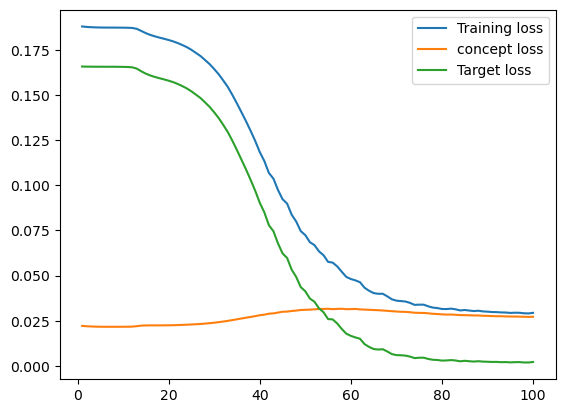

In [7]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

In [8]:
from source.test_model import test_with_CUB

test_loss, test_concept_loss, test_target_loss= test_with_CUB(model,
                                                                test_data,
                                                                device,
                                                                img_shape=28)

ValueError: too many values to unpack (expected 3)

In [5]:
training_loss, concept_loss, target_loss = train_model.train_with_CUB(model=model,
                           epochs=100,
                           BATCH_SIZE=32,
                           train_data=train_data,
                           device=device,
                           learning_rate=0.1,
                           consider_concept_loss=True,
                           img_shape=28)

d:\ML_Projects\CBM\jupyter_notebooks\..\source\train_model.py:99: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  X = torch.tensor(X_list).to(device)


Epoch 1: Training loss  0.18786, concept loss:  0.02215, target loss:  0.16571

Epoch 2: Training loss  0.18763, concept loss:  0.02196, target loss:  0.16567

Epoch 3: Training loss  0.18747, concept loss:  0.02183, target loss:  0.16564

Epoch 4: Training loss  0.18737, concept loss:  0.02174, target loss:  0.16563

Epoch 5: Training loss  0.18732, concept loss:  0.02169, target loss:  0.16562

Epoch 6: Training loss  0.18729, concept loss:  0.02168, target loss:  0.16562

Epoch 7: Training loss  0.18728, concept loss:  0.02167, target loss:  0.16561

Epoch 8: Training loss  0.18728, concept loss:  0.02167, target loss:  0.16560

Epoch 9: Training loss  0.18727, concept loss:  0.02168, target loss:  0.16560

Epoch 10: Training loss  0.18726, concept loss:  0.02168, target loss:  0.16558

Epoch 11: Training loss  0.18725, concept loss:  0.02169, target loss:  0.16556

Epoch 12: Training loss  0.18721, concept loss:  0.02171, target loss:  0.16550

Epoch 13: Training loss  0.18711, con

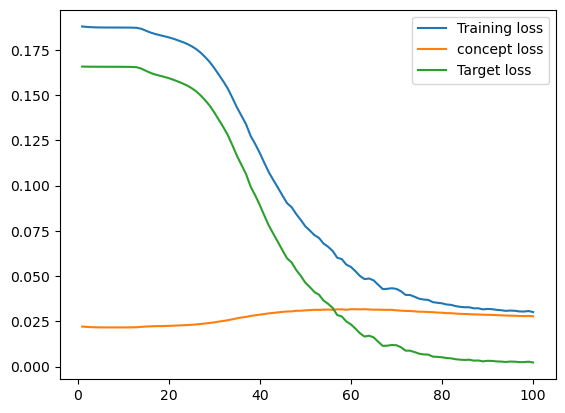

In [6]:
import numpy as np
import matplotlib.pyplot as plt
epochs_in_training = 100

training_loss = torch.tensor(training_loss, device="cpu")
concept_loss = torch.tensor(concept_loss, device="cpu")
target_loss = torch.tensor(target_loss, device="cpu")

training_loss = np.array(training_loss)
concept_loss = np.array(concept_loss)
target_loss = np.array(target_loss)

x_axis = np.arange(1,epochs_in_training+1,1)

plt.plot(x_axis, training_loss, label = "Training loss")
plt.plot(x_axis, concept_loss, label= "concept loss")
plt.plot(x_axis, target_loss, label="Target loss")
plt.legend()
plt.show()

In [ ]:
#save thetrained model after 100 iteration
torch.save(model, '../saved_models/model_100_iteration.pickle')

In [6]:
from source.test_model import test_with_CUB
test_with_CUB(model,
              test_data,
              device,
              n_concepts=312,
              n_labels=200,
              img_shape=28
              )

TEST LOSS: 0.00103 CONCEPT LOSS:  0.00012 TARGET LOSS:  0.00091

TARGET ACCURACY:  0.00552

Precisions:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

d:\ML_Projects\CBM\jupyter_notebooks\..\source\test_model.py:107: RuntimeWarning: invalid value encountered in longlong_scalars
  recalls.append(CF_Mat[i][i]/col)


(tensor(0.0010),
 tensor(0.0001),
 tensor(0.0009),
 0.005522954780807732,
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.06666666666666667,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


In [ ]:
test_loss = test_loss.to("cpu")
print(test_loss, test_concept_loss, test_target_loss)

In [ ]:
import numpy as np 
training_loss = torch.tensor(training_loss, device = 'cpu')
training_loss = np.array(training_loss)

In [ ]:
import matplotlib.pyplot as plt  
import numpy
loss_values = loss_values.to("cpu")
plt.plot(numpy.array(loss_values), 'r')

In [ ]:
type(loss_values[0])

In [6]:
5/2

2.5

In [ ]:
loss_fn = nn.CrossEntropyLoss()
loss_fn2 = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [ ]:
import torch

from torchvision import transforms

from PIL import Image


epochs = 3
BATCH_SIZE =32
total_batch =len(train_data)
total_batch = (int) (total_batch/32)
print(total_batch)
resize = transforms.Resize(size=(28,28))
gray = transforms.Grayscale()
convert_tensor = transforms.ToTensor()
loss_values=[]

for epoch in range(epochs):
     train_loss=0.0
     for batch in range(total_batch):
          X_list =[]
          concept_list =[]
          class_list =[]
          #print(f"Batch {batch}:\n")
          for i in range(BATCH_SIZE):
               img_path = train_data[ batch*BATCH_SIZE+i ]['img_path']
               img = Image.open(img_path)
               img =convert_tensor(gray(resize(img)))
               img_np = img.numpy()
               X_list.append(img_np)
               concept_list.append(train_data[ batch*BATCH_SIZE+i]['attribute_label'])
               class_list.append(train_data[ batch*BATCH_SIZE+i]['class_label'])
          #print(f"X shape {X_list[0].shape}, Y Shape: {len(concept_list)} , concepts: {len(class_list)}")
          X = torch.tensor(X_list).to(device)
          concepts = torch.tensor(concept_list).to(device)
          y = torch.tensor(class_list).to(device)
          #print(f"X shape {X.shape}, Y Shape: {y.shape} , concepts: {concepts.shape}")
          model.train()
          y_logits, c_hats = model(X)
          #y_logits = model(X)
          optimizer.zero_grad()
          loss1 = loss_fn2(c_hats, concepts.float())
          loss2 = loss_fn(y_logits, y)
          loss = loss1+loss2
          train_loss += loss
          loss.backward()
          optimizer.step()
          if batch%50==0:
               print(f"Total {batch*32} data processed")
     train_loss /= (batch*32)
     loss_values.append(train_loss)
     print(f"Train loss: {train_loss}")

               


In [ ]:
img_path = train_data[ batch*BATCH_SIZE+0 ]['img_path']
img_path

In [ ]:
import torch

from torchvision import transforms

from PIL import Image
import numpy as np

In [ ]:
resize = transforms.Resize(size=(28,28))
convert_tensor = transforms.ToTensor()
#resized_img = 
img_x =convert_tensor(resize(img))

In [ ]:
img_x.type

In [ ]:
import numpy as np

In [ ]:
img_np = img_x.numpy()

In [ ]:
img_np.shape

In [ ]:
X = []

In [ ]:
X.append(img_np)

In [ ]:
len(X)

In [ ]:
a_tensor = torch.tensor(X)

In [ ]:
a_tensor[0].type

In [ ]:
type(train_data[0]['class_label'])

In [12]:
import sys
sys.path.insert(0, "..")
from source.data_processing import extract_attribute_label_ranges

dir ="../dataset/CUB_200_2011/"

CONCEPT_GROUP_MAP, idx_to_attribute, attribute_to_idx = extract_attribute_label_ranges(dir)

In [22]:
len(CONCEPT_GROUP_MAP), idx_to_attribute[1], attribute_to_idx['has_wing_color::iridescent']

(28, 'has_bill_shape::curved_(up_or_down)', 12)

In [18]:

for keys in CONCEPT_GROUP_MAP:
    print(f"{keys}: low {min(CONCEPT_GROUP_MAP[keys])} high {max(CONCEPT_GROUP_MAP[keys])} and size: {len(CONCEPT_GROUP_MAP[keys])}")


has_bill_shape: low 1 high 9 and size: 9
has_wing_color: low 10 high 24 and size: 15
has_upperparts_color: low 25 high 39 and size: 15
has_underparts_color: low 40 high 54 and size: 15
has_breast_pattern: low 55 high 58 and size: 4
has_back_color: low 59 high 73 and size: 15
has_tail_shape: low 74 high 79 and size: 6
has_upper_tail_color: low 80 high 94 and size: 15
has_head_pattern: low 95 high 105 and size: 11
has_breast_color: low 106 high 120 and size: 15
has_throat_color: low 121 high 135 and size: 15
has_eye_color: low 136 high 149 and size: 14
has_bill_length: low 150 high 152 and size: 3
has_forehead_color: low 153 high 167 and size: 15
has_under_tail_color: low 168 high 182 and size: 15
has_nape_color: low 183 high 197 and size: 15
has_belly_color: low 198 high 212 and size: 15
has_wing_shape: low 213 high 217 and size: 5
has_size: low 218 high 222 and size: 5
has_shape: low 223 high 236 and size: 14
has_back_pattern: low 237 high 240 and size: 4
has_tail_pattern: low 241 high

In [10]:
attribute_idx, concept, concept_label

('1', 'has_bill_shape', 'curved_(up_or_down)')

In [1]:
import torch
sample_tensor = torch.tensor([2.4,5.0, 1.0, 3.5, 4. ,6.0, 6., 1., 3.5])

In [4]:
sample_tensor[2:5], torch.argmax(sample_tensor[2:5])

(tensor([1.0000, 3.5000, 4.0000]), tensor(2))